# 2.其他批次效应去除方法

使用scib环境

In [2]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import scanpy as sc
from velovgi.preprocessing import latentvelo_preprocess, review_preprocess # 这个包只能单独提出来，或者出错的话，多次导入几次

## 1. 数据读入

In [5]:
# 红系成熟部分
adata_filename = "./data/erythroid_lineage.h5ad"

adata = sc.read(adata_filename)
batch_key = "stage"
cluster_key = "celltype"
adata

AnnData object with n_obs × n_vars = 500 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [6]:
adata_bak = adata.copy()

## 2. 批次效应去除

In [7]:
adata = adata_bak.copy()
review_save_dir = "./data/erythroid_lineage_review.h5ad"
review_preprocess(adata, batch_key=batch_key, cluster_key=cluster_key, epochs=500, save=review_save_dir)

Filtered out 51490 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/usr/local/conda/envs/scib/lib/python3.8/site-packages/scvi/data/_utils.py:172: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 234/500:  47%|████▋     | 234/500 [00:58<01:06,  3.98it/s, loss=1.48e+04, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 24560.305. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/conda/envs/scib/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/usr/local/conda/envs/scib/lib/python3.8/site-packages/scvi/data/_utils.py:172: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 30/500:   6%|▌         | 30/500 [00:06<01:41,  4.64it/s, loss=159, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 631.842. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
computing neighbors


/usr/local/conda/envs/scib/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/usr/local/conda/envs/scib/lib/python3.8/site-packages/scvi/data/_utils.py:172: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(


    finished (0:00:12) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 500 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [8]:
adata = adata_bak.copy()
latentvelo_save_dir = "./data/erythroid_lineage_latentvelo.h5ad"
latentvelo_preprocess(adata, batch_key=batch_key, cluster_key=cluster_key, epochs=500, save=latentvelo_save_dir)

/usr/local/conda/envs/scib/lib/python3.8/site-packages/scvi/data/_utils.py:172: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Filtered out 51490 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 260/500:  52%|█████▏    | 260/500 [00:56<00:52,  4.57it/s, loss=1.19e+04, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 24907.844. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/conda/envs/scib/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/usr/local/conda/envs/scib/lib/python3.8/site-packages/scvi/data/_utils.py:172: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(


computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 500 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

## 3. 速率图可视化对比

In [13]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import scvelo as scv
import velovgi

In [14]:
review_save_dir = "./data/erythroid_lineage_review.h5ad"
latentvelo_save_dir = "./data/erythroid_lineage_latentvelo.h5ad"

batch_key = "stage"
cluster_key = "celltype"

adata_review = scv.read(review_save_dir)
adata_latentvelo = scv.read(latentvelo_save_dir)
adata_velovgi = velovgi.tl.read_adata("./data/adata/")

scv.tl.velocity(adata_review)
scv.tl.velocity_graph(adata_review)

scv.tl.velocity(adata_latentvelo)
scv.tl.velocity_graph(adata_latentvelo)

load ./data/adata//adata.h5ad
load ./data/adata//sample_recover.pkl
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/500 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


<AxesSubplot: title={'center': 'velovgi'}>

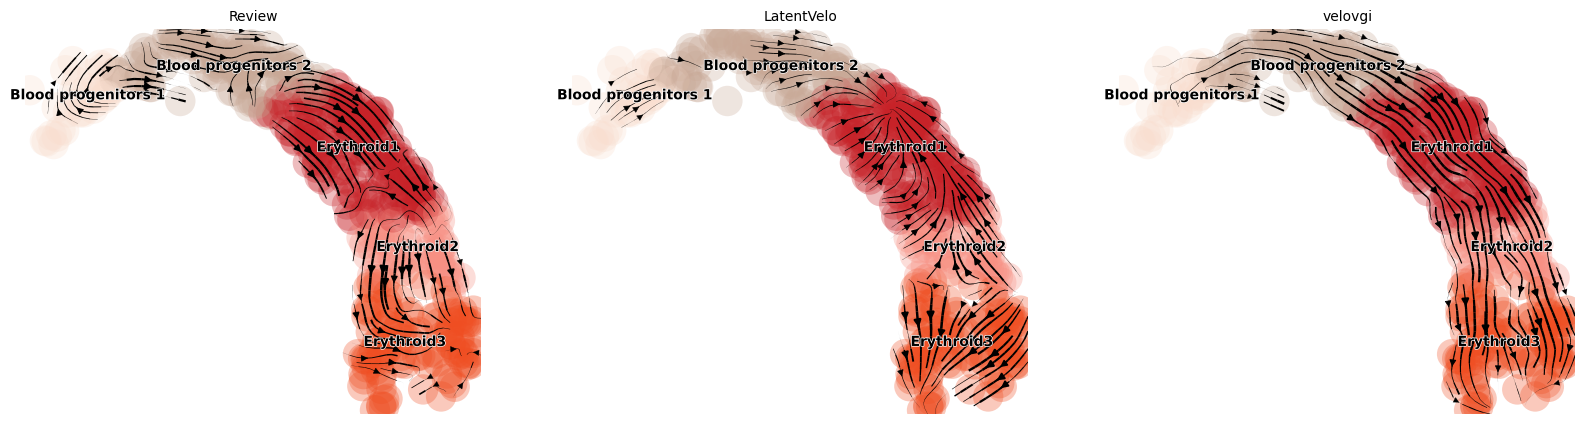

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,5))

scv.pl.velocity_embedding_stream(adata_review, color=cluster_key, title="Review", ax=ax[0], show=False)
scv.pl.velocity_embedding_stream(adata_latentvelo, color=cluster_key, title="LatentVelo", ax=ax[1], show=False)
scv.pl.velocity_embedding_stream(adata_velovgi, color=cluster_key, title="velovgi", ax=ax[2], show=False)

## 4. 指标对比

In [22]:
cluster_edges = [
    ("Blood progenitors 1", "Blood progenitors 2"), 
    ("Blood progenitors 2", "Erythroid1"), 
    ("Erythroid1", "Erythroid2"), 
    ("Erythroid2", "Erythroid3")
    ] # 已知的细胞类型间的分化信息

name_list = ["review","latentvelo","velovgi"]
adata_list = [adata_review, adata_latentvelo, adata_velovgi]

df= velovgi.tl.get_metric_total_df(name_list, adata_list, cluster_edges, cluster_key) # 指标计算
df

,CBDir,Metric,Score,ICVCoh,Model
0,-0.558175,CBDir,-0.558175,NaN,review
1,-0.879059,CBDir,-0.879059,NaN,review
2,0.371013,CBDir,0.371013,NaN,review
3,-0.641182,CBDir,-0.641182,NaN,review
4,0.674470,CBDir,0.674470,NaN,review
...,...,...,...,...,...
495,NaN,ICVCoh,0.973602,0.973602,velovgi
496,NaN,ICVCoh,0.969792,0.969792,velovgi
497,NaN,ICVCoh,0.970067,0.970067,velovgi
498,NaN,ICVCoh,0.977946,0.977946,velovgi


<AxesSubplot: xlabel='Metric', ylabel='Score'>

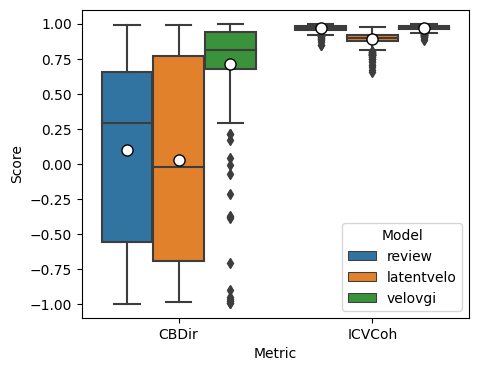

In [40]:
import seaborn as sns
figure, ax = plt.subplots(1, 1, figsize=(5,4))

x = "Metric"
y = "Score"
orient = "v"

sns.boxplot(
    df,
    orient=orient, x=x, y=y, hue="Model",
    showmeans=True,
    meanprops={"marker":"o",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"8"})
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1, 0.5)) # 移动图例